In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import urllib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import mysql.connector as connection


In [2]:
download_dir = "./data/"
os.makedirs(download_dir , exist_ok=True)
download_url = "https://raw.githubusercontent.com/mohitmahiyt/CarPricePredictionDataset/main/cars_dataset.csv"
filename = os.path.basename(download_url)
print(filename)

download_file_path = os.path.join(download_dir,filename)
print(download_file_path)

urllib.request.urlretrieve(download_url,download_file_path)


cars_dataset.csv
./data/cars_dataset.csv


('./data/cars_dataset.csv', <http.client.HTTPMessage at 0x1bf5418f5b0>)

In [3]:
df=pd.read_csv(r"./data/cars_dataset.csv")
df

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,30016,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,30017,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,30018,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,30019,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [5]:
try:
    conn = connection.connect(user='root',password='696969')
except Exception as e:
    print(e)
else:
    print('connected')
    print('database connected succesfully')
finally:
    conn.close()


connected
database connected succesfully


In [6]:
try:
    conn = connection.connect(user='root', password='696969')
    query="create database if not exists car_database;"
    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()
except Exception as e:
    print(e)
else:
    print('connected')
    print("database created successfully")
finally:
    conn.close()
try:
    conn = connection.connect(user='root', password='696969', database="car_database")
    query="""create table if not exists car_dataset(
car_name varchar(30),
brand varchar(30),
model varchar(30),
vehicle_age int,
km_driven int,
seller_type varchar(30),
fuel_type varchar(30),
transmission_type varchar(30),
mileage float,
engine int,
max_power float,
seats int,
selling_price bigint);"""

    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()
except Exception as e:
    print(e)
else:
    print('connected')
    print("table created successfully")
finally:
    conn.close()

connected
database created successfully
connected
table created successfully


In [7]:
try:
    conn = connection.connect(user='root', password='696969', database="car_database")
    query="""truncate car_dataset;"""
    cursor = conn.cursor()
    cursor.execute(query)
    conn.commit()

    query = f"""truncate car_dataset;"""
    cursor = conn.cursor()
    cursor.execute(query)        
    conn.commit()
    for key, value in df.iterrows():
        car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price = value[0],value[1], value[2], value[3], value[4],value[5] ,value[6],value[7] ,value[8] ,value[9] ,value[10] ,value[11] ,value[12] 
        
        query = f"""insert into car_dataset values ('{car_name}','{brand}', '{model}',{vehicle_age},{km_driven},'{seller_type}','{fuel_type}','{transmission_type}',{mileage},{engine},{max_power},{seats},{selling_price});"""
        cursor = conn.cursor()
        cursor.execute(query)
    conn.commit()

except Exception as e:
    print(e)
else:
    print('connected')
    print("table created successfully")
finally:
    conn.close()

connected
table created successfully


In [8]:
pd.Categorical(df['car_name'])

['Maruti Alto', 'Maruti Alto', 'Maruti Alto', 'Maruti Alto', 'Maruti Alto', ..., 'Bentley Continental', 'Rolls-Royce Ghost', 'Bentley Continental', 'Ferrari GTC4Lusso', 'Bentley Continental']
Length: 15411
Categories (121, object): ['Audi A4', 'Audi A6', 'Audi A8', 'Audi Q7', ..., 'Volvo S90', 'Volvo XC', 'Volvo XC60', 'Volvo XC90']

In [9]:
df.describe(include='object')

,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


# observations=>
- hyundai i20=> 906

EDA

In [10]:
# split numerical and categorical features

numerical_features =[feature for feature in df.columns if df[feature].dtype !='0']
categorical_features = [feature for feature in df.columns if df[feature].dtype !='0']
print(f"there are{len(numerical_features)}numerical features named:{numerical_features}")
print(f"there are{len(categorical_features)}categorical features named:{categorical_features}")

there are13numerical features named:['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
there are13categorical features named:['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [11]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000


In [12]:
df.tail()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.6,5998,552.0,4,8100000
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.2,6592,563.0,4,24200000
15408,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.0,5998,600.0,5,5200000
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000
15410,Bentley Continental,Bentley,Continental,9,9000,Dealer,Petrol,Automatic,9.5,5998,626.0,4,14500000


In [13]:
df.shape

(15411, 13)

In [14]:
pd.Categorical(df['car_name'])

['Maruti Alto', 'Maruti Alto', 'Maruti Alto', 'Maruti Alto', 'Maruti Alto', ..., 'Bentley Continental', 'Rolls-Royce Ghost', 'Bentley Continental', 'Ferrari GTC4Lusso', 'Bentley Continental']
Length: 15411
Categories (121, object): ['Audi A4', 'Audi A6', 'Audi A8', 'Audi Q7', ..., 'Volvo S90', 'Volvo XC', 'Volvo XC60', 'Volvo XC90']

In [15]:
df.isnull().mean()

car_name             0.0
brand                0.0
model                0.0
vehicle_age          0.0
km_driven            0.0
seller_type          0.0
fuel_type            0.0
transmission_type    0.0
mileage              0.0
engine               0.0
max_power            0.0
seats                0.0
selling_price        0.0
dtype: float64

In [16]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True))



car_name
Hyundai i20           0.058789
Maruti Swift Dzire    0.057751
Maruti Swift          0.050678
Maruti Alto           0.050483
Honda City            0.049121
                        ...   
Maserati Ghibli       0.000065
Hyundai Aura          0.000065
Force Gurkha          0.000065
Isuzu MUX             0.000065
Ferrari GTC4Lusso     0.000065
Name: proportion, Length: 121, dtype: float64
brand
Maruti           0.323924
Hyundai          0.193498
Honda            0.096360
Mahindra         0.065602
Toyota           0.051457
Ford             0.051262
Volkswagen       0.040231
Renault          0.034780
BMW              0.028486
Tata             0.027902
Mercedes-Benz    0.021867
Skoda            0.021673
Audi             0.012459
Datsun           0.011031
Jaguar           0.003828
Land Rover       0.003309
Jeep             0.002660
Kia              0.002076
Porsche          0.001363
Volvo            0.001298
MG               0.001233
Mini             0.001103
Nissan           0.000714


univariant Analysis =>

- the main purpose of univariant is to understand the distribution of a single variable/feature

In [17]:
df["car_name"].dtype

dtype('O')

In [18]:
df["max_power"].dtype

dtype('float64')

In [20]:
df["car_name"].dtype == 'O'

True

In [21]:
df["car_name"].dtype != 'O'

False

In [22]:
print("Missing value present in different columns of DataFrame are as follows: ")
print('-'*100)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().sum().count()*100).sort_values(ascending=False)
pd.DataFrame({"Total":total, "Percentage":percent})

Missing value present in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percentage
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


In [23]:
# propotion of each unique value in categorical variable

for col in categorical_features:
    print((df[col].value_counts(normalize=True)*100).to_string())
    print()
    print("-----------------------------------------------------")
    print()

car_name
Hyundai i20               5.878918
Maruti Swift Dzire        5.775096
Maruti Swift              5.067809
Maruti Alto               5.048342
Honda City                4.912076
Maruti Wagon R            4.652521
Hyundai Grand             3.763546
Toyota Innova             3.536435
Hyundai Verna             3.192525
Hyundai i10               2.660437
Ford Ecosport             2.426838
Volkswagen Polo           2.420349
Maruti Baleno             2.361949
Honda Amaze               2.348972
Maruti Ciaz               2.245150
Maruti Ertiga             2.225683
Hyundai Creta             2.180261
Mahindra XUV500           2.141328
Renault KWID              1.985595
Maruti Vitara             1.914217
Mahindra Scorpio          1.771462
Ford Figo                 1.758484
Volkswagen Vento          1.602751
Maruti Celerio            1.537863
Renault Duster            1.414574
Mahindra Bolero           1.369152
Toyota Fortuner           1.213419
Skoda Rapid               1.180975
Honda Jazz 

In [26]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [27]:
print("Missing value present in different columns of DataFrame are as follows: ")
print('-'*100)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().sum().count()*100).sort_values(ascending=False)
pd.DataFrame({"Total":total, "Percentage":percent})

Missing value present in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percentage
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


In [28]:
for col in categorical_features:
    print((df[col].value_counts(normalize=True)*100).to_string())
    print()
    print("-----------------------------------------------------")
    print()

car_name
Hyundai i20               5.878918
Maruti Swift Dzire        5.775096
Maruti Swift              5.067809
Maruti Alto               5.048342
Honda City                4.912076
Maruti Wagon R            4.652521
Hyundai Grand             3.763546
Toyota Innova             3.536435
Hyundai Verna             3.192525
Hyundai i10               2.660437
Ford Ecosport             2.426838
Volkswagen Polo           2.420349
Maruti Baleno             2.361949
Honda Amaze               2.348972
Maruti Ciaz               2.245150
Maruti Ertiga             2.225683
Hyundai Creta             2.180261
Mahindra XUV500           2.141328
Renault KWID              1.985595
Maruti Vitara             1.914217
Mahindra Scorpio          1.771462
Ford Figo                 1.758484
Volkswagen Vento          1.602751
Maruti Celerio            1.537863
Renault Duster            1.414574
Mahindra Bolero           1.369152
Toyota Fortuner           1.213419
Skoda Rapid               1.180975
Honda Jazz 

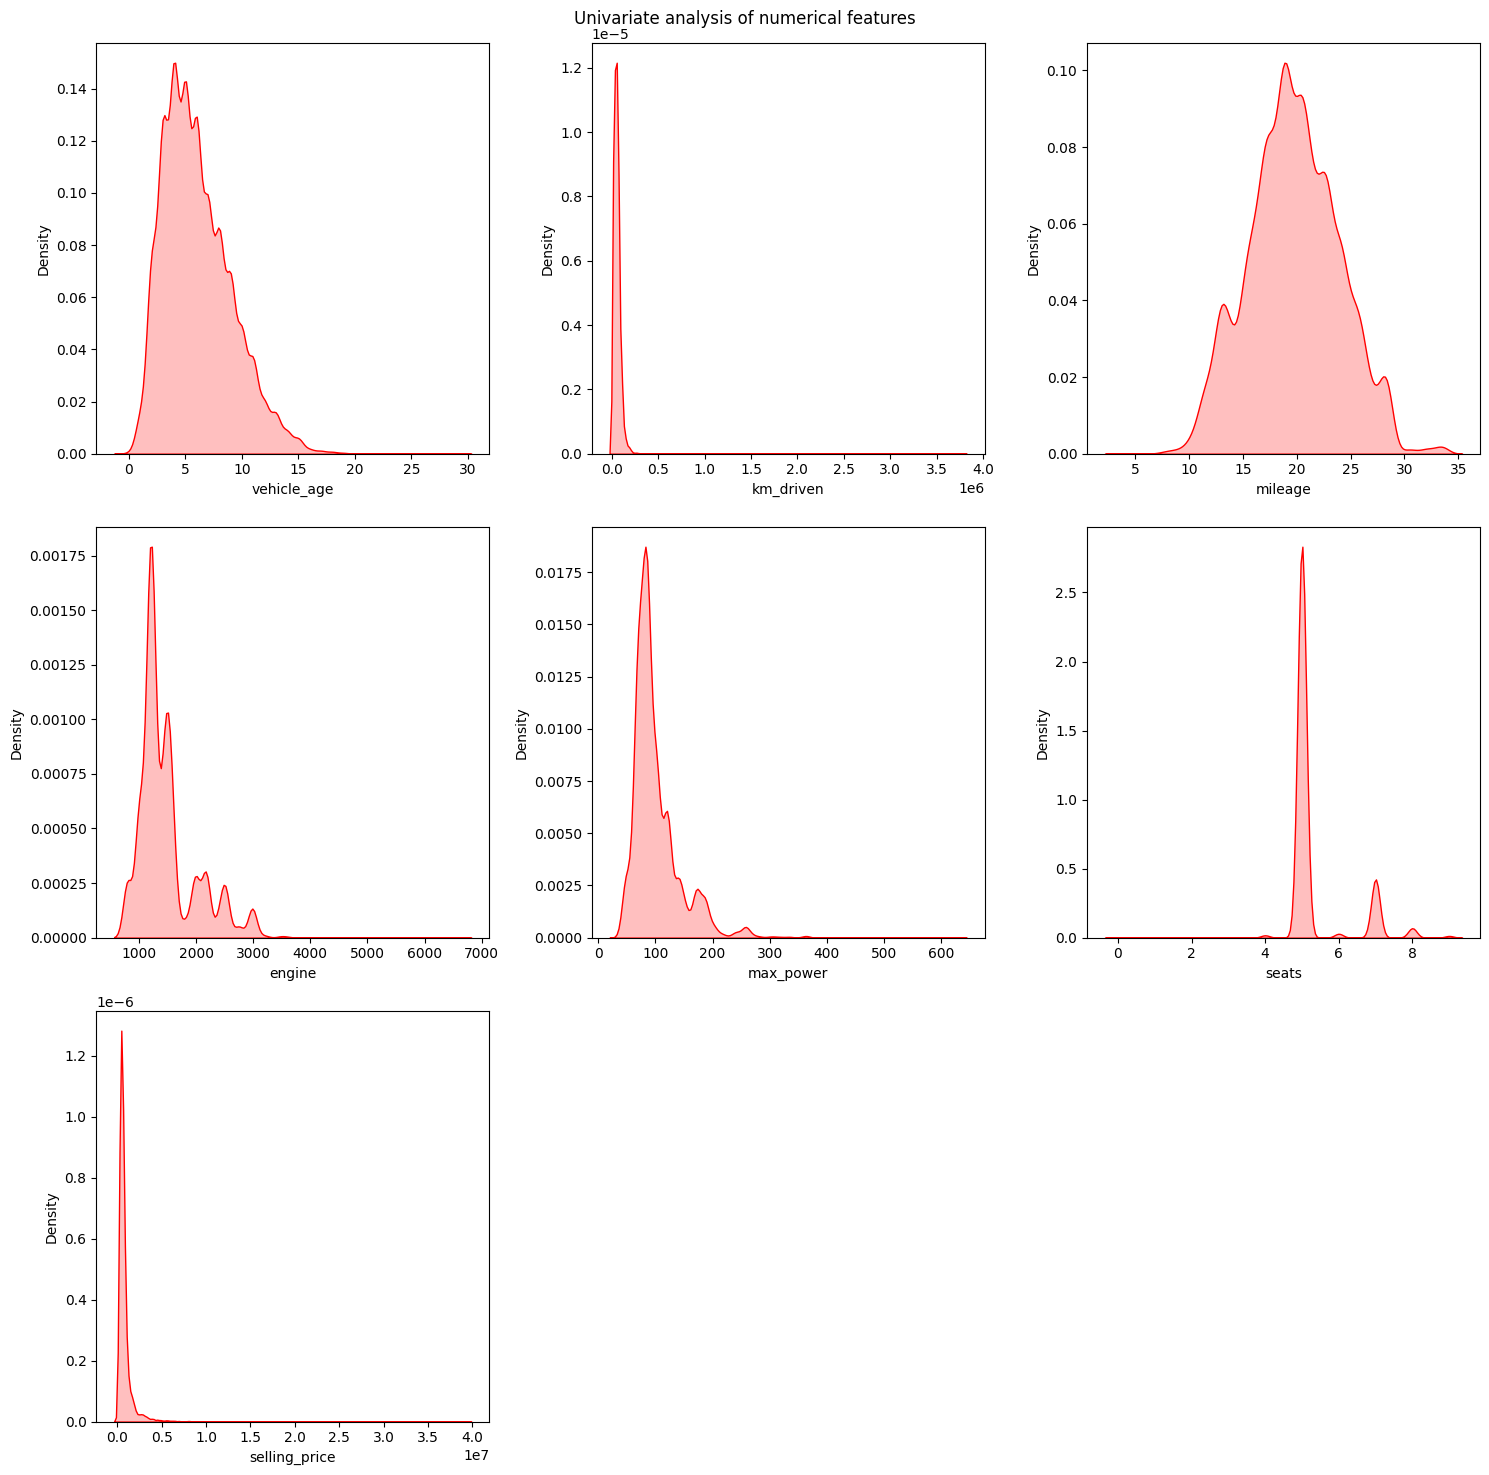

In [29]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x= df[numeric_features[i]], color='r', shade =True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

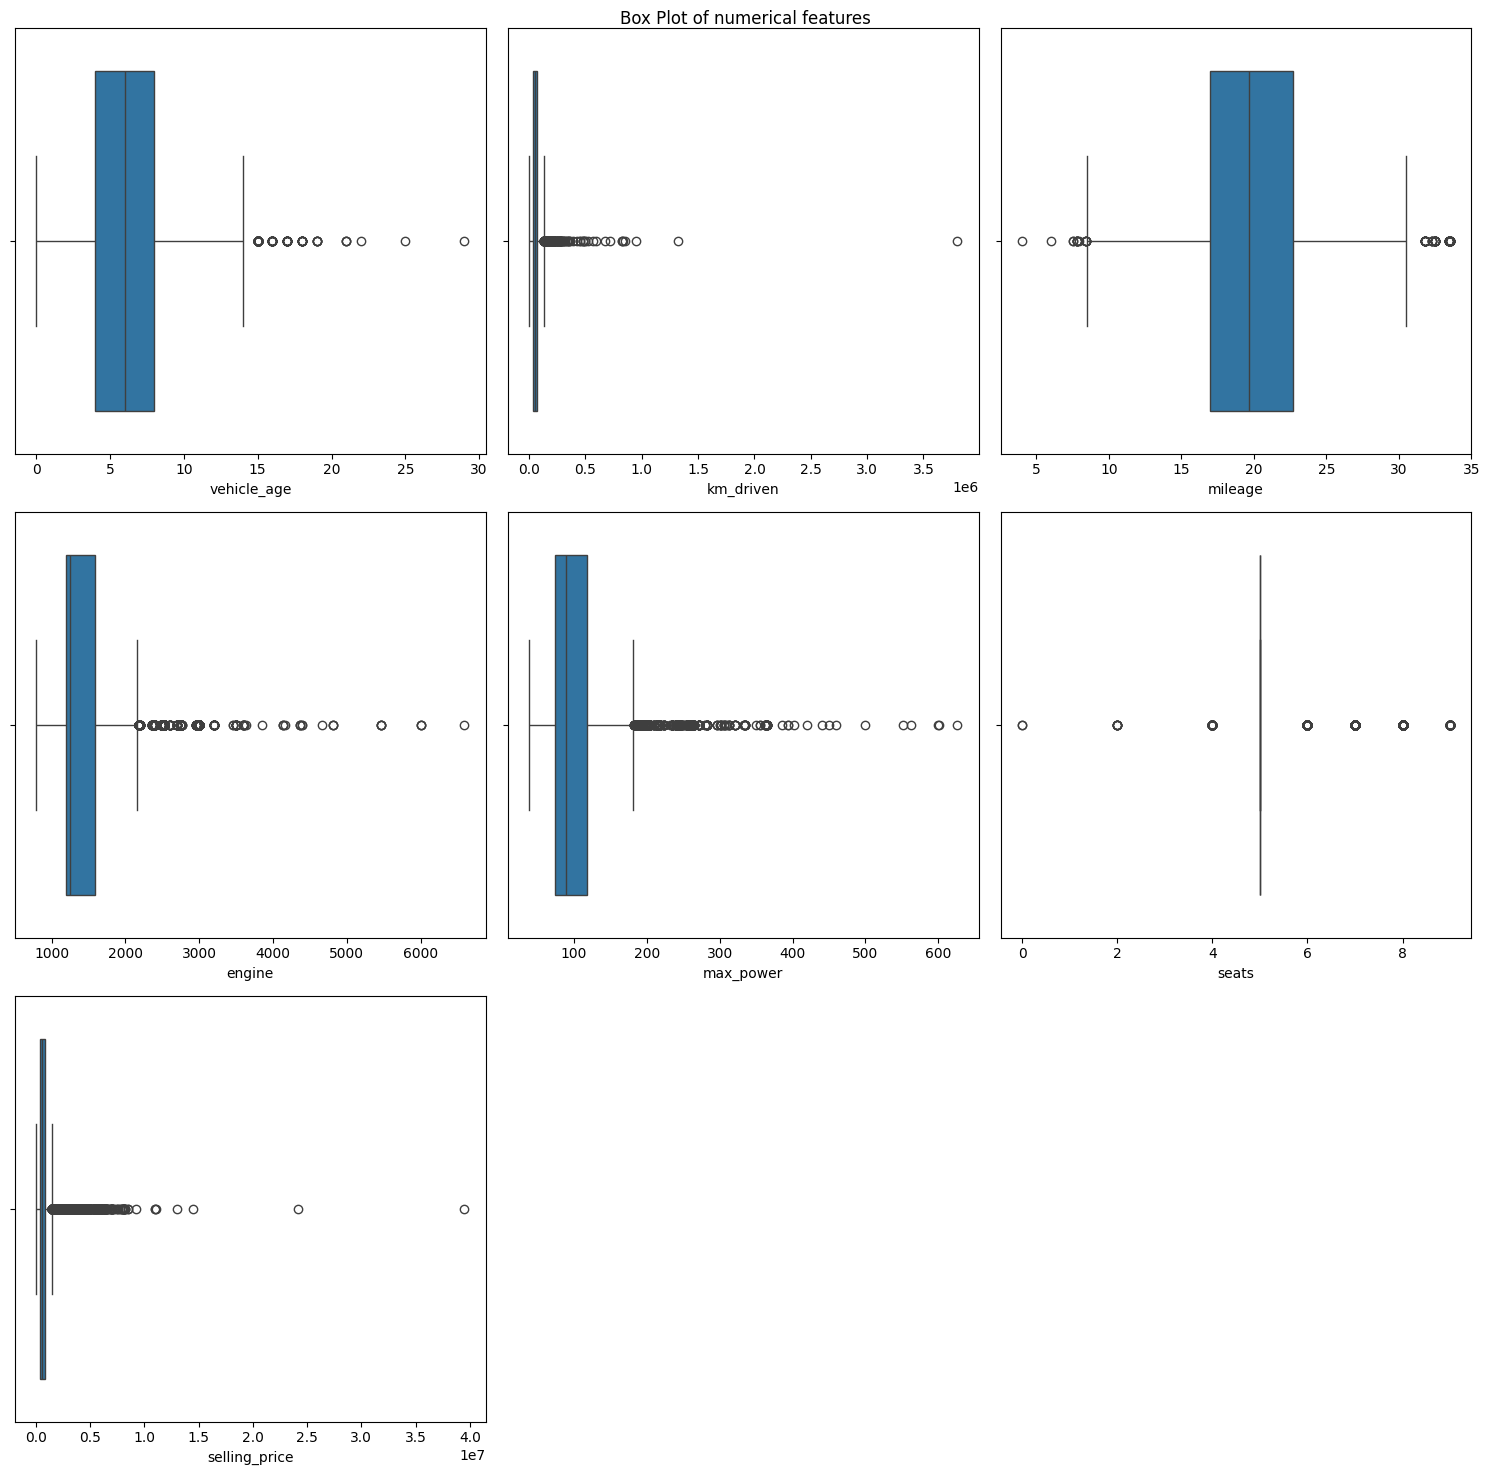

In [30]:

plt.figure(figsize=(15,15))

plt.suptitle("Box Plot of numerical features")

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x= df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [31]:
df[categorical_features]

,car_name,brand,model,seller_type,fuel_type,transmission_type
0,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
1,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
2,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
3,Maruti Alto,Maruti,Alto,Dealer,CNG,Manual
4,Maruti Alto,Maruti,Alto,Individual,CNG,Manual
...,...,...,...,...,...,...
15406,Bentley Continental,Bentley,Continental,Dealer,Petrol,Automatic
15407,Rolls-Royce Ghost,Rolls-Royce,Ghost,Individual,Petrol,Automatic
15408,Bentley Continental,Bentley,Continental,Dealer,Petrol,Automatic
15409,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,Dealer,Petrol,Automatic


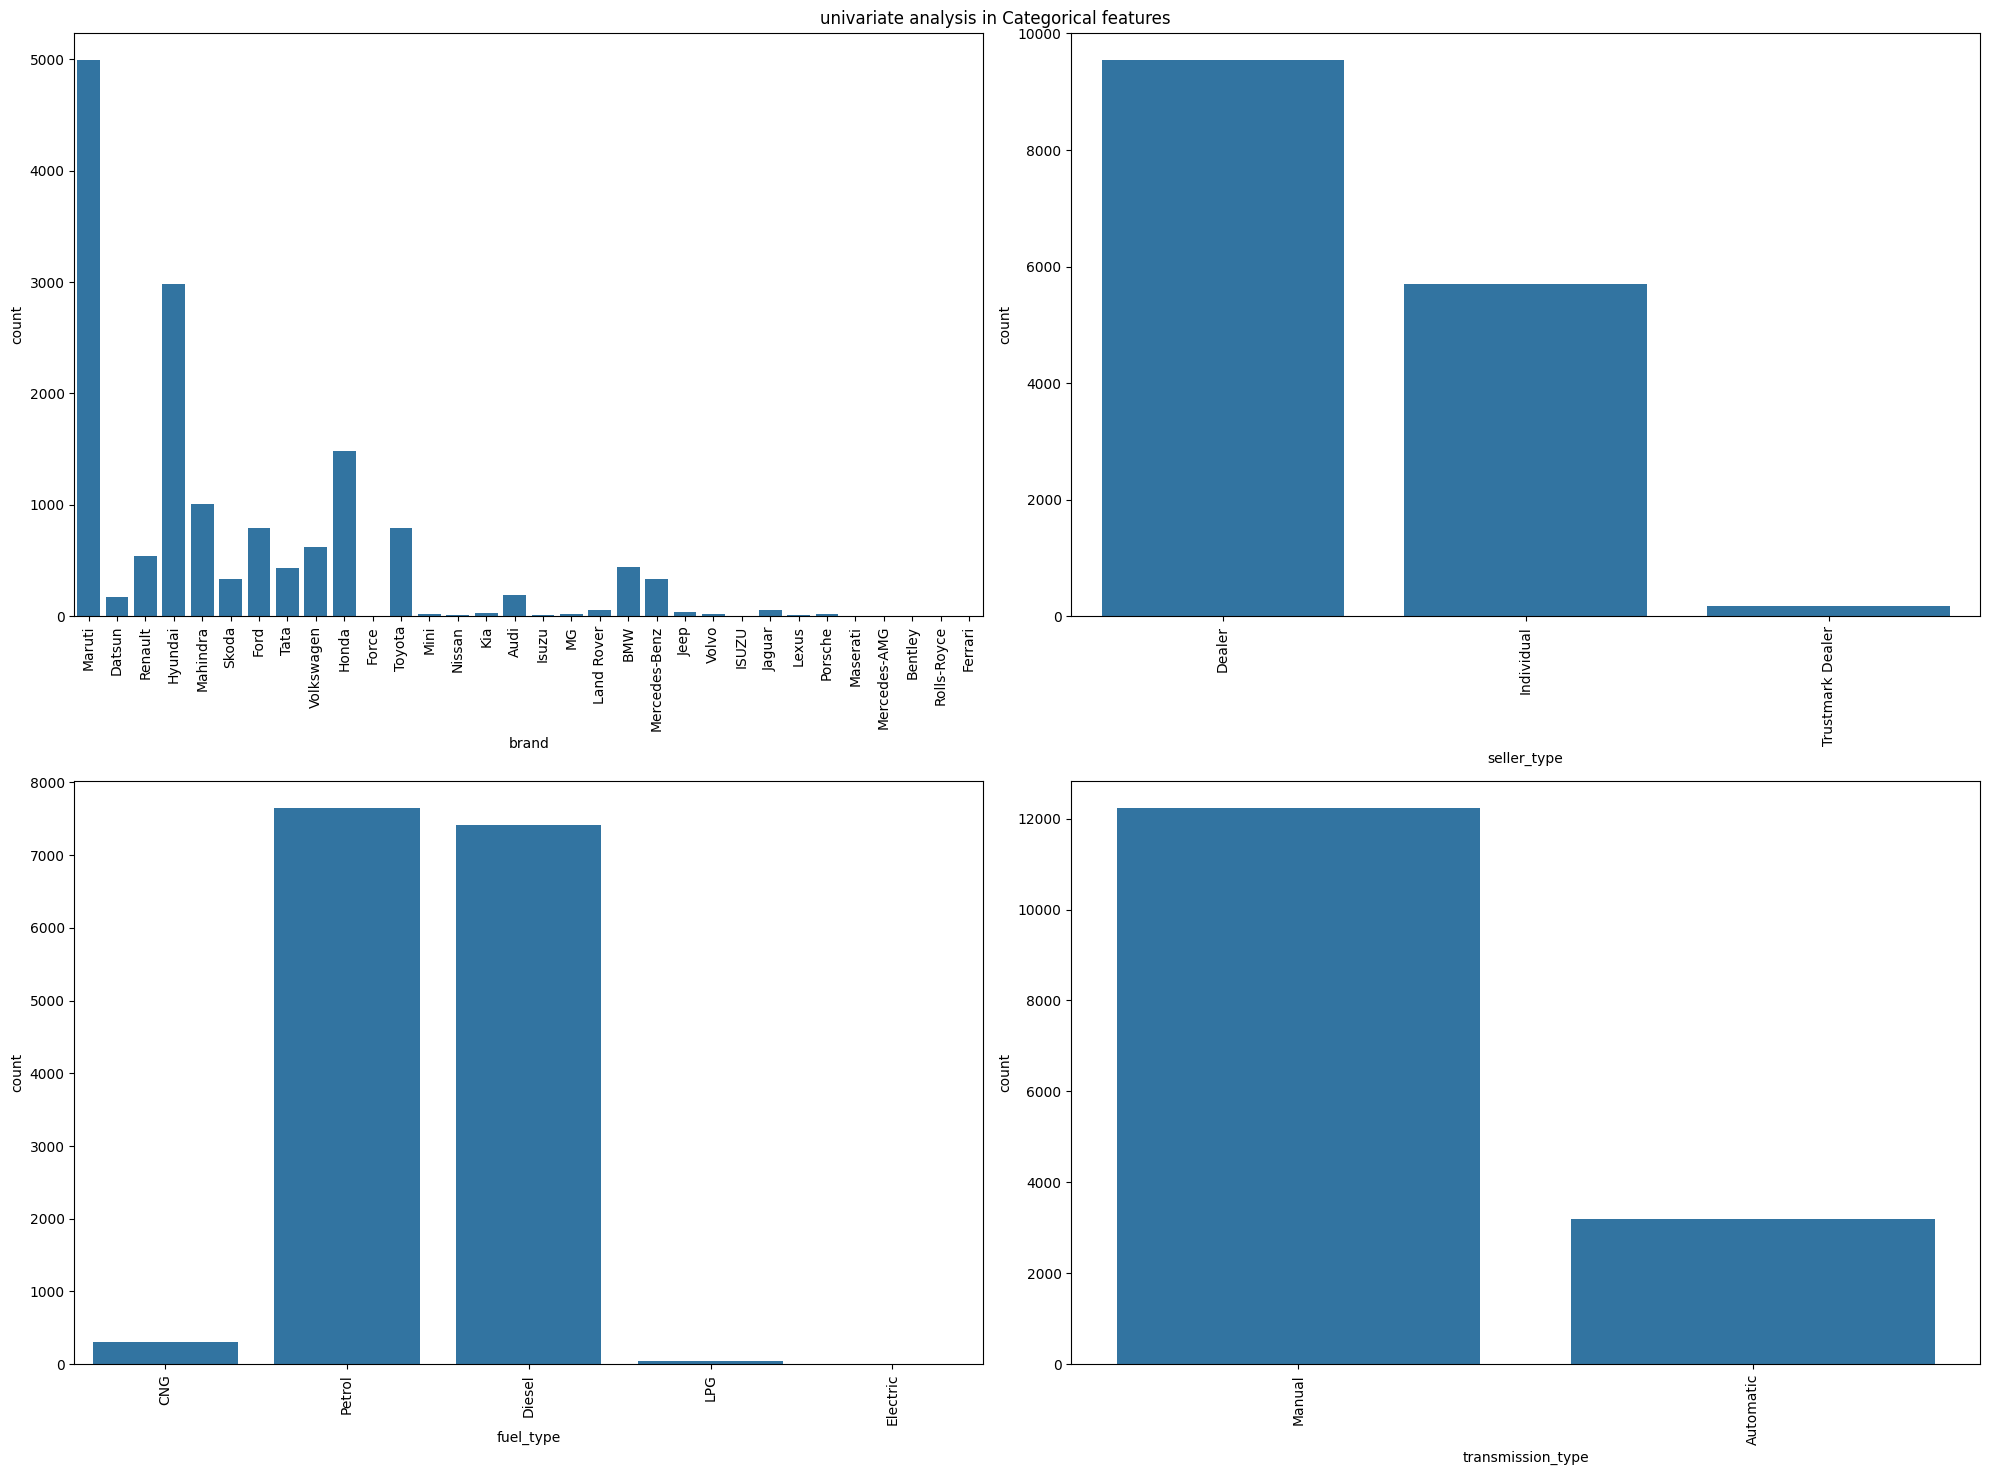

In [32]:
plt.figure(figsize= (20,15))
plt.suptitle("univariate analysis in Categorical features")
cat = ["brand", "seller_type", "fuel_type", "transmission_type"]
for i in range(len(cat)) :
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat[i]])
    plt.xticks(rotation=90)
    plt.xlabel(cat[i])
    plt.tight_layout()


In [33]:
df[numeric_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


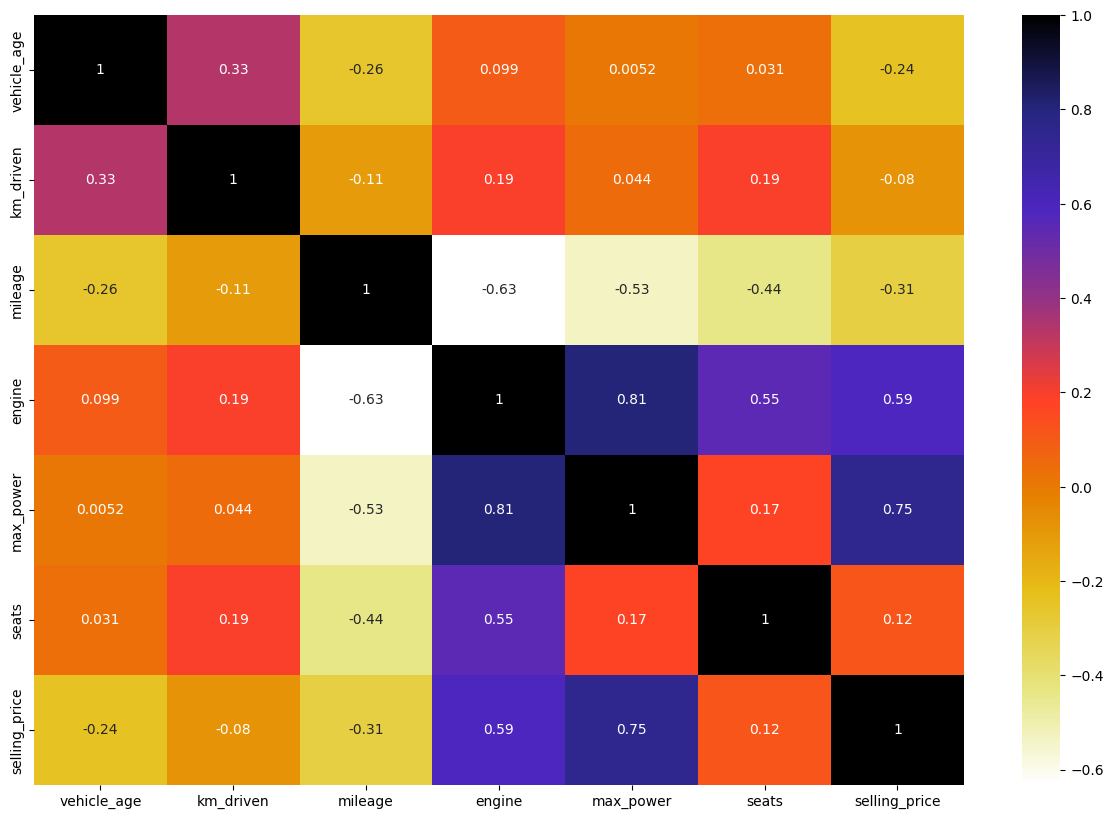

In [34]:
plt.figure(figsize = (15,10))
#sns.heatmap(df.corr(), cmap="CMRmap_r", annot=True)
sns.heatmap(df[numeric_features].corr(), cmap="CMRmap_r",annot=True)
plt.show()

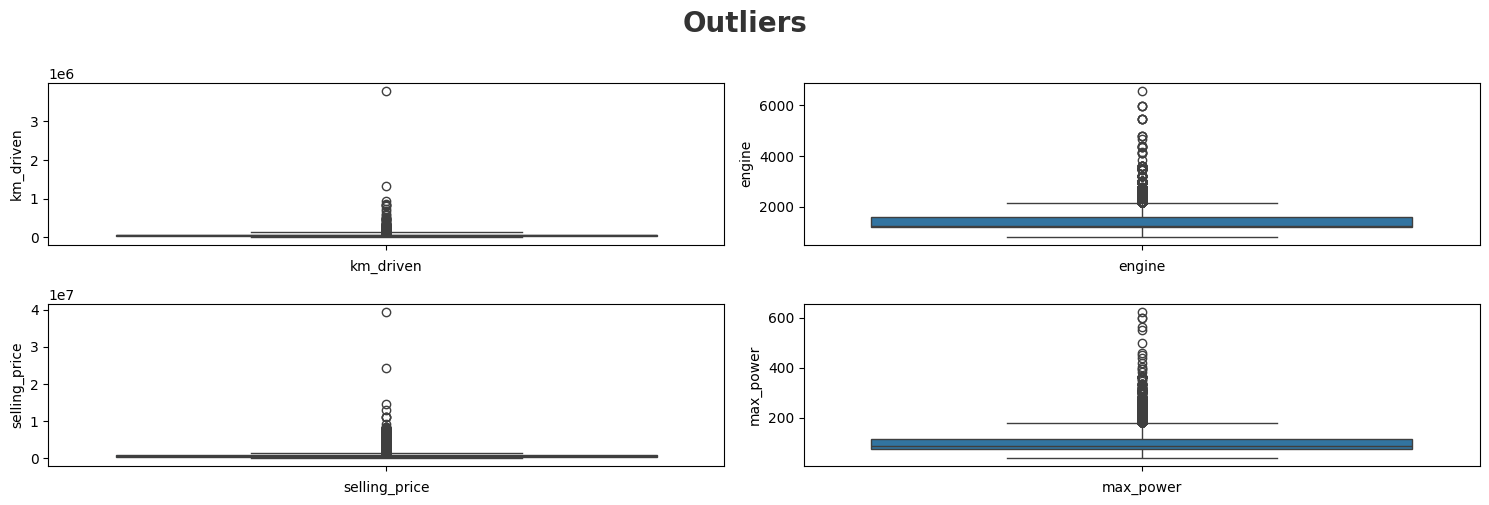

In [35]:
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold",alpha=0.8,y=1)

outliers= ['km_driven', 'engine', 'selling_price','max_power']
# outliers= numeric_features
for i in range(len(outliers)):
    #plt.subplot(4,2,i+1)
    plt.subplot(2,2,i+1)
    sns.boxplot(df[outliers[i]])
    plt.xlabel(outliers[i])
    plt.tight_layout()